Name- Aanshika Verma |
College- IGDTUW |
course- Btech |
email id- vermaaanshika05@gmail.com

Topic- Predicting Heart Disease with Machine Learning: A Comparative Study of Logistic Regression and K-Nearest Neighbor Models

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

Data collection and Preprocessing

In [ ]:
# loading data
data = pd.read_csv('/content/data.csv')

In [ ]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
data.shape

(270, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
# checking missing values
data.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [ ]:
# statistical view of data
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


Data cleaning

'Heart Disease'


*   absence --> 0
*   presence --> 1



In [ ]:
# replacing values for logistic regression algorithm
data['Heart Disease']=data['Heart Disease'].replace(['Absence','Presence'],[0,1])

In [ ]:
data['Heart Disease'].unique()

array([1, 0])

In [ ]:
data['Heart Disease'].value_counts(normalize=True)

,proportion
Heart Disease,
0,0.555556
1,0.444444


In [ ]:
data['Heart Disease'].value_counts()

,count
Heart Disease,
0,150
1,120


Splitting data into heart disease and other features



In [ ]:
X = data.drop(columns='Heart Disease',axis=1)
Y = data['Heart Disease']

In [ ]:
print(X)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int64


Training and Testing Data


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(270, 13) (216, 13) (54, 13)


LOGISTIC REGRESSION






In [ ]:
model=LogisticRegression()

In [ ]:
#trainig model with training data
model.fit(X_train,Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#MODEL EVALUATION
#accuracy on training data
X_train_predict = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predict,Y_train )

In [ ]:
print('Accuracy on Training Data : ',training_data_accuracy)

Accuracy on Training Data :  0.875


In [ ]:
#accuracy on testing data
X_test_predict = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_predict,Y_test )

In [ ]:
print('Accuracy on Test Data : ',test_data_accuracy)

Accuracy on Test Data :  0.8333333333333334


In [ ]:
lr_acc = accuracy_score(Y_test,X_test_predict)
print(lr_acc)

0.8333333333333334


In [ ]:
confusion_matrix = confusion_matrix(Y_test,X_test_predict)
print(confusion_matrix)

[[27  3]
 [ 6 18]]


In [ ]:
report = classification_report(Y_test,X_test_predict)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.86      0.75      0.80        24

    accuracy                           0.83        54
   macro avg       0.84      0.82      0.83        54
weighted avg       0.84      0.83      0.83        54



KNN


In [ ]:
# Cross validation to find optimal K value
k_value = range(1,40)

In [ ]:
k_score = []

In [ ]:
for k in k_value:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn,X,Y,cv=5,scoring='accuracy')
  k_score.append(score.mean())


In [ ]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

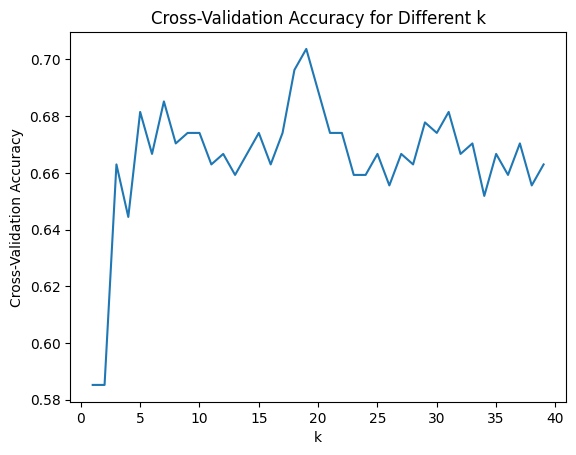

In [ ]:
plt.plot(k_value, k_score)
plt.xlabel('k')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy for Different k')
plt.show()


In [ ]:
# Optimal K Value using cross validation
opt_k = k_value[np.argmax(k_score)]
print(opt_k)

19


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train , Y_train)

KNeighborsClassifier()

In [ ]:
knn_Y = knn_model.predict(X_test)

MODEL EVALUATION
KNN

In [ ]:
knn_acc = accuracy_score(Y_test,knn_Y)
print(knn_acc)

0.6666666666666666


In [ ]:
confusion_matrix = confusion_matrix(Y_test,knn_Y)
print(confusion_matrix)

[[25  5]
 [13 11]]


In [ ]:
#classification
report = classification_report(Y_test,knn_Y)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.83      0.74        30
           1       0.69      0.46      0.55        24

    accuracy                           0.67        54
   macro avg       0.67      0.65      0.64        54
weighted avg       0.67      0.67      0.65        54



ROC curve and AUC


In [ ]:
Y_prob_lr = model.predict_proba(X_test)[:,1]
Y_prob_knn = knn_model.predict_proba(X_test)[:,1]

In [ ]:
fpr_lr, tpr_lr, _ = roc_curve(Y_test, Y_prob_lr)
fpr_knn, tpr_knn, _ = roc_curve(Y_test, Y_prob_knn)

In [ ]:
auc_lr = auc(fpr_lr, tpr_lr)
auc_knn = auc(fpr_knn, tpr_knn)

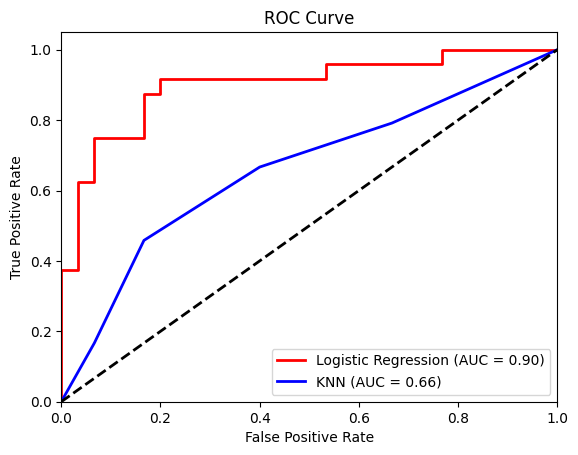

In [ ]:
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='red', lw=2,label='Logistic Regression (AUC = %0.2f)' % auc_lr)
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2,label='KNN (AUC = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

PREDICTIVE SYSTEM

Logical Regression prediction



In [ ]:
input_data = (56,1,1,120,236,0,1,178,0,0.8,2,0,2)
#numpy array of input
input_data_array = np.asarray(input_data)
#reshape array
input_data_reshaped = input_data_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('Heart Disease NOT Present')
else:
  print('Heart Disease Present')

KNN Prediction

In [ ]:
input_data = (56,1,1,120,236,0,1,178,0,0.8,2,0,2)
#numpy array of input
input_data_array = np.asarray(input_data)
#reshape array
input_data_reshaped = input_data_array.reshape(1,-1)
prediction = knn_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('Heart Disease NOT Present')
else:
  print('Heart Disease Present')

Saving the trained model


In [ ]:
import pickle


In [ ]:
trained_file = 'trained_model.sav'
with open(trained_file, 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# Load saved model
load_model = pickle.load(open(trained_file,'rb'))


In [ ]:
input_data = (56,1,1,120,236,0,1,178,0,0.8,2,0,2)
#numpy array of input
input_data_array = np.asarray(input_data)
#reshape array
input_data_reshaped = input_data_array.reshape(1,-1)
prediction = load_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('Heart Disease NOT Present')
else:
  print('Heart Disease Present')